In [1]:

import gensim
from gensim.models import Word2Vec, FastText
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import brown

# Download necessary NLTK data
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ANGELAANGUILANO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANGELAANGUILANO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:

# --- 1. Prepare Data ---
# Using the Brown corpus for demonstration. We'll pre-process it a bit.
print("Preparing data...")
sentences = brown.sents()
processed_sentences = [[word.lower() for word in sentence if word.isalpha()] for sentence in sentences]

# Filter out empty sentences after processing
processed_sentences = [s for s in processed_sentences if s]

print(f"Number of processed sentences: {len(processed_sentences)}")
print(f"First 5 processed sentences: {processed_sentences[:5]}")

Preparing data...
Number of processed sentences: 56766
First 5 processed sentences: [['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place'], ['the', 'jury', 'further', 'said', 'in', 'presentments', 'that', 'the', 'city', 'executive', 'committee', 'which', 'had', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlanta', 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted'], ['the', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'reports', 'of', 'possible', 'irregularities', 'in', 'the', 'primary', 'which', 'was', 'won', 'by', 'ivan', 'allen'], ['only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', 'the', 'jury', 'said', 'considering', 'the', 'widesprea

In [3]:

# --- 2. Word2Vec Demonstration ---
print("\n--- Word2Vec Demonstration ---")
# Train a Word2Vec model
# Parameters: vector_size (dimensions of the embedding), window (context window size), min_count (ignore words with frequency lower than this)
word2vec_model = Word2Vec(sentences=processed_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0) # sg=0 for CBOW, sg=1 for Skip-gram
word2vec_model.train(processed_sentences, total_examples=word2vec_model.corpus_count, epochs=10)
print("Word2Vec model trained.")

# Get word vectors
word2vec_vector_king = word2vec_model.wv['king']
word2vec_vector_queen = word2vec_model.wv['queen']
word2vec_vector_man = word2vec_model.wv['man']
word2vec_vector_woman = word2vec_model.wv['woman']

print(f"Vector for 'king': {word2vec_vector_king[:5]}...")

# Find most similar words
print("Words most similar to 'king' (Word2Vec):")
for word, score in word2vec_model.wv.most_similar('king'):
    print(f"  {word}: {score:.4f}")

print("\nAnalogy: 'king' - 'man' + 'woman' = ? (Word2Vec)")
result = word2vec_model.wv.most_similar(positive=['king', 'woman'], negative=['man'])
for word, score in result:
    print(f"  {word}: {score:.4f}")


--- Word2Vec Demonstration ---
Word2Vec model trained.
Vector for 'king': [ 0.6089936   0.43386626 -1.0782328   0.10578308 -0.32264522]...
Words most similar to 'king' (Word2Vec):
  richard: 0.8004
  judge: 0.7753
  governor: 0.7749
  john: 0.7631
  henry: 0.7604
  charles: 0.7575
  smith: 0.7475
  mary: 0.7437
  colonel: 0.7436
  rainier: 0.7432

Analogy: 'king' - 'man' + 'woman' = ? (Word2Vec)
  queen: 0.7680
  mary: 0.7570
  szold: 0.7447
  richard: 0.7446
  anne: 0.7433
  judy: 0.7337
  giles: 0.7324
  henry: 0.7313
  samuel: 0.7286
  james: 0.7266


In [4]:

# --- 3. GloVe Demonstration (Conceptual/Simplified) ---
print("\n--- GloVe Demonstration (Conceptual/Simplified) ---")
print("GloVe is typically trained on large corpora and pre-trained models are often used.")
print("For educational purposes, we'll illustrate its principles by showing how to load a pre-trained model (if available) or discuss its output structure.")
print("Training GloVe from scratch is computationally intensive and beyond a simple demo.")

# In a real scenario, you would download a pre-trained GloVe model, e.g., from:
# https://nlp.stanford.edu/projects/glove/
# And then load it like this (example, requires glove.6B.100d.txt to be downloaded and unzipped):
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = 'glove.6B.100d.txt'
# word2vec_output_file = 'glove.6B.100d.word2vec.txt'
# glove2word2vec(glove_input_file, word2vec_output_file)
# glove_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# For this demo, we'll simulate a GloVe-like output using Word2Vec for comparison
# (This is NOT actual GloVe, but shows how you'd interact with vectors)
# If you had a loaded glove_model, you would use glove_model.wv['word']



--- GloVe Demonstration (Conceptual/Simplified) ---
GloVe is typically trained on large corpora and pre-trained models are often used.
For educational purposes, we'll illustrate its principles by showing how to load a pre-trained model (if available) or discuss its output structure.
Training GloVe from scratch is computationally intensive and beyond a simple demo.


In [5]:

# --- 4. FastText Demonstration ---
print("\n--- FastText Demonstration ---")
# Train a FastText model
# FastText is an extension of Word2Vec that uses subword information.
fasttext_model = FastText(sentences=processed_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)
fasttext_model.train(processed_sentences, total_examples=fasttext_model.corpus_count, epochs=10)
print("FastText model trained.")



--- FastText Demonstration ---
FastText model trained.


In [6]:

# Get word vectors
fasttext_vector_king = fasttext_model.wv['king']
print(f"Vector for 'king': {fasttext_vector_king[:5]}...")

# Find most similar words
print("Words most similar to 'king' (FastText):")
for word, score in fasttext_model.wv.most_similar('king'):
    print(f"  {word}: {score:.4f}")

print("\nAnalogy: 'king' - 'man' + 'woman' = ? (FastText)")
result_ft = fasttext_model.wv.most_similar(positive=['king', 'woman'], negative=['man'])
for word, score in result_ft:
    print(f"  {word}: {score:.4f}")

# FastText's strength: handling out-of-vocabulary (OOV) words and misspelled words
print("\nFastText with OOV word 'runing' (misspelled 'running'):")
if 'runing' in fasttext_model.wv:
    print(f"Vector for 'runing': {fasttext_model.wv['runing'][:5]}...")
else:
    print("Word 'runing' not in vocabulary, but FastText can still infer a vector.")
    # FastText can generate vectors for OOV words by combining subword embeddings
    # Note: For words not seen at all, it might still return a vector based on its character n-grams.
    # The 'in' check above might be true if the word was encountered, but if it's truly OOV,
    # fasttext_model.wv['oovword'] would still return a vector.
    # Let's try a truly unseen word to demonstrate this.
    print(f"Inferred vector for 'unseenwordxyz': {fasttext_model.wv['unseenwordxyz'][:5]}...")



Vector for 'king': [ 0.6062264  3.47017   -2.198327   1.017416   0.6003531]...
Words most similar to 'king' (FastText):
  yanking: 0.9891
  joking: 0.9885
  lyking: 0.9884
  poking: 0.9871
  lurking: 0.9868
  hulking: 0.9866
  evoking: 0.9848
  risking: 0.9830
  peking: 0.9823
  choking: 0.9818

Analogy: 'king' - 'man' + 'woman' = ? (FastText)
  joking: 0.9329
  hulking: 0.9313
  wrecking: 0.9299
  yanking: 0.9296
  evoking: 0.9290
  choking: 0.9283
  shrieking: 0.9270
  loving: 0.9264
  swaying: 0.9264
  howling: 0.9257

FastText with OOV word 'runing' (misspelled 'running'):
Vector for 'runing': [-0.06180692  2.1461442  -0.9627595   0.8419472   0.9508645 ]...



--- Visualization (t-SNE) ---
Applying t-SNE for Word2Vec...
Applying t-SNE for FastText...
t-SNE plot saved as 'word_embeddings_tsne_plot.png'


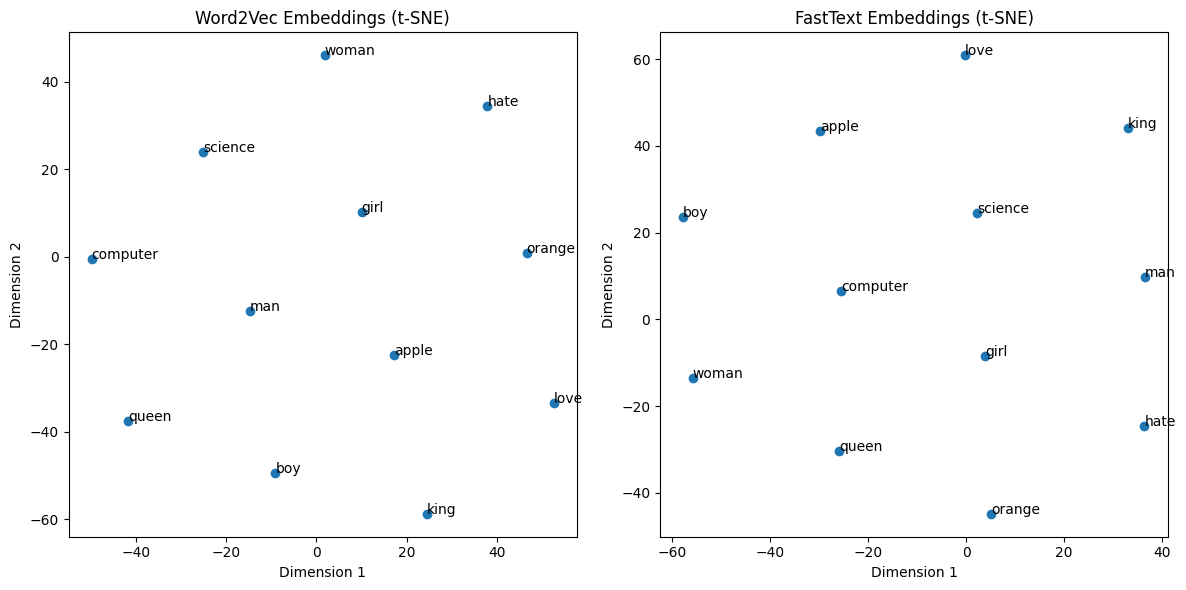

In [7]:

# --- 5. Visualization (t-SNE) ---
print("\n--- Visualization (t-SNE) ---")
# Select some common words for visualization
words_to_visualize = ['king', 'queen', 'man', 'woman', 'boy', 'girl', 'apple', 'orange', 'computer', 'science', 'love', 'hate']

# Filter words that are actually in the vocabulary
word2vec_vocab_words = [word for word in words_to_visualize if word in word2vec_model.wv]
fasttext_vocab_words = [word for word in words_to_visualize if word in fasttext_model.wv]

if len(word2vec_vocab_words) < 2 or len(fasttext_vocab_words) < 2:
    print("Not enough words in vocabulary for visualization after filtering. Try a larger corpus or different words.")
else:
    # Get vectors for Word2Vec
    word2vec_vectors = [word2vec_model.wv[word] for word in word2vec_vocab_words]
    word2vec_vectors = np.array(word2vec_vectors)

    # Get vectors for FastText
    fasttext_vectors = [fasttext_model.wv[word] for word in fasttext_vocab_words]
    fasttext_vectors = np.array(fasttext_vectors)

    # Apply t-SNE for dimensionality reduction to 2D
    print("Applying t-SNE for Word2Vec...")
    tsne_w2v = TSNE(n_components=2, random_state=42, perplexity=min(len(word2vec_vocab_words)-1, 30))
    word2vec_2d = tsne_w2v.fit_transform(word2vec_vectors)

    print("Applying t-SNE for FastText...")
    tsne_ft = TSNE(n_components=2, random_state=42, perplexity=min(len(fasttext_vocab_words)-1, 30))
    fasttext_2d = tsne_ft.fit_transform(fasttext_vectors)

    # Plotting Word2Vec results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(word2vec_2d[:, 0], word2vec_2d[:, 1])
    for i, word in enumerate(word2vec_vocab_words):
        plt.annotate(word, xy=(word2vec_2d[i, 0], word2vec_2d[i, 1]))
    plt.title('Word2Vec Embeddings (t-SNE)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Plotting FastText results
    plt.subplot(1, 2, 2)
    plt.scatter(fasttext_2d[:, 0], fasttext_2d[:, 1])
    for i, word in enumerate(fasttext_vocab_words):
        plt.annotate(word, xy=(fasttext_2d[i, 0], fasttext_2d[i, 1]))
    plt.title('FastText Embeddings (t-SNE)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    plt.tight_layout()
    plt.savefig('word_embeddings_tsne_plot.png')
    print("t-SNE plot saved as 'word_embeddings_tsne_plot.png'")
    plt.show()

In [8]:
print("\n--- Conclusion ---")
print("This script demonstrates the basic usage of Word2Vec and FastText for generating word embeddings.")
print("It also conceptually explains GloVe, which is typically used with pre-trained models.")
print("The t-SNE plots provide a visual representation of how these models map words into a lower-dimensional space.")



--- Conclusion ---
This script demonstrates the basic usage of Word2Vec and FastText for generating word embeddings.
It also conceptually explains GloVe, which is typically used with pre-trained models.
The t-SNE plots provide a visual representation of how these models map words into a lower-dimensional space.
